In [159]:
import pickle
import random
import sklearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

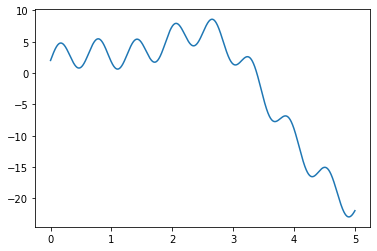

In [160]:
f = open("data.pkl", "rb")
raw = pickle.load(f)
plt.plot(raw[:,0], raw[:,1])
np.random.shuffle(raw)


In [161]:
training_size = len(raw) // 10 * 9
training_set = raw[:training_size]
print(training_set[:5])


[[ 1.276       3.36674635]
 [ 3.479      -3.384658  ]
 [ 1.601       2.88196398]
 [ 1.128       0.70203846]
 [ 3.428      -1.44700291]]


In [162]:
test_set = raw[training_size:]
print(test_set[:5])

[[  1.567        3.5428307 ]
 [  4.376      -16.05062295]
 [  1.384        5.23427748]
 [  4.676      -18.03785642]
 [  2.68         8.4709148 ]]


In [163]:
assert(len(training_set) + len(test_set) == len(raw))

In [164]:
partition_size = len(training_set) // 10
print(training_set[:5])

[[ 1.276       3.36674635]
 [ 3.479      -3.384658  ]
 [ 1.601       2.88196398]
 [ 1.128       0.70203846]
 [ 3.428      -1.44700291]]


In [165]:
# for l in range(1, 10):
#     for i in range(10):
#         x = []
#         y = []
#         for j in range(len(samplingData[i])):
#             xList = []

#             for m in range(1, l + 1):
#                 xList.append(samplingData[i][j][0] ** m)
#             x.append(xList)

#             y.append(samplingData[i][j][1])
#         regrModel = linear_model.LinearRegression()

#         regrModel.fit(x, y)
#         xTest = []
#         xTestPlot = []
#         yTest = []
#         for k in range(len(testData)):
#             xTestList = []
#             xTestPlot.append(testData[k][0])
#             for m in range(1, l + 1):
#                 xTestList.append(testData[k][0] ** m)
#             xTest.append(xTestList)
#             yTest.append(testData[k][1])
#             yPred = regrModel.predict(xTest)
#             yTrain = regrModel.predict(x)

#         plt.scatter(xTestPlot, yTest)
#         plt.plot(xTestPlot, yPred)
#         plt.show()

degree 1 bias = 31.808001661181976
degree 2 bias = 6.1732678508855825
degree 3 bias = 5.167109107556065
degree 4 bias = 3.167753576483868
degree 5 bias = 2.9797315306938352
degree 6 bias = 2.580855240736809
degree 7 bias = 2.4116569483719785
degree 8 bias = 2.3680826369140027
degree 9 bias = 2.3663159272158247


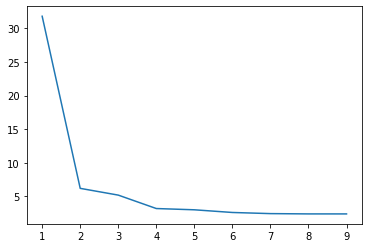

In [224]:
test_xs = test_set[:, :1]
test_ys = test_set[:, 1]

degree_vs_bias = np.zeros(shape=(9))

for degree in range(1, 10):

    test_poly_xs = np.zeros(shape=(test_set.shape[0], degree))
    for row in range(test_set.shape[0]):
        test_poly_xs[row] = np.concatenate(
            list(test_xs[row] ** i for i in range(1, degree + 1))
        )

    predicted = np.zeros(shape=(test_set.shape[0], 10))

    for set_idx in range(10):
        lo = set_idx * partition_size
        hi = (set_idx + 1) * partition_size

        cur_training = training_set[lo:hi]
        train_xs = cur_training[:, :1]
        train_ys = cur_training[:, 1]
        poly = np.zeros(shape=(cur_training.shape[0], degree))
        for row in range(cur_training.shape[0]):
            np.concatenate(
                list(train_xs[row] ** i for i in range(1, degree + 1)), out=poly[row]
            )

        model = linear_model.LinearRegression()

        model.fit(poly, train_ys)

        predicted[:, set_idx] = model.predict(test_poly_xs)

    expected_val = np.sum(predicted, axis=1) / 10
    assert expected_val.shape == test_ys.shape
    degree_vs_bias[degree - 1] = (
        np.sum((expected_val - test_ys) ** 2) / expected_val.shape
    )

    print("degree {} bias = {}".format(degree, degree_vs_bias[degree - 1]))

plt.plot(list(range(1, 10)), degree_vs_bias)